In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<ipython-input-3-53168ca6acc9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

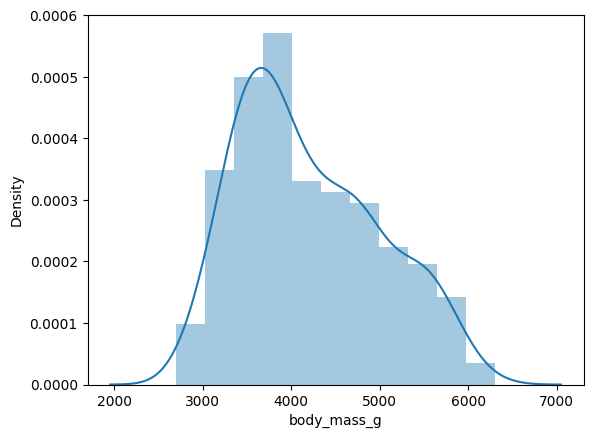

In [3]:
#univariate analysis
sns.distplot(df['body_mass_g'])

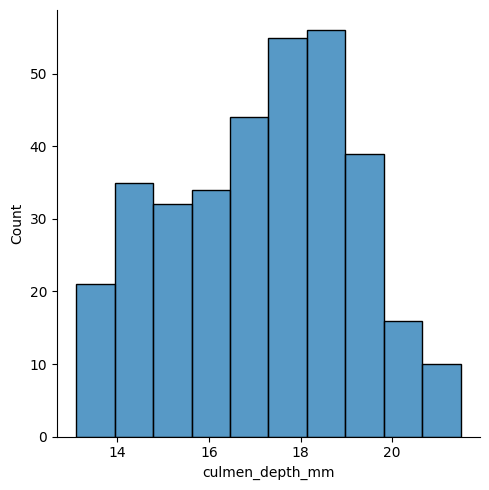

In [5]:
sns.displot(df['culmen_depth_mm'])

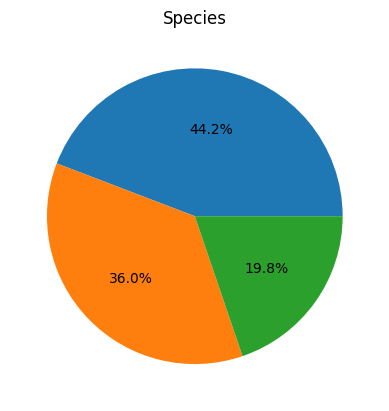

In [6]:
plt.pie(df['species'].value_counts(), autopct='%1.1f%%')
plt.title('Species')
plt.show()

<Axes: xlabel='culmen_length_mm', ylabel='species'>

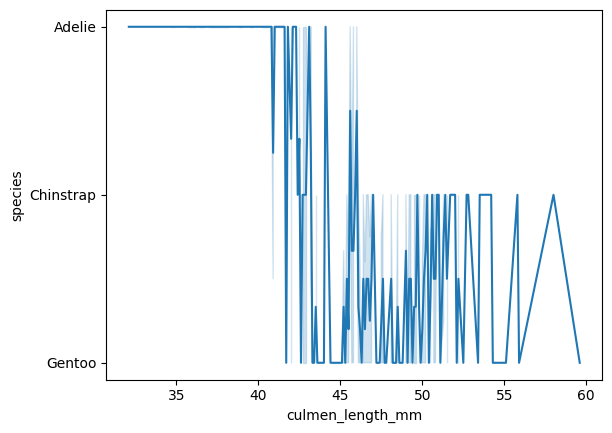

In [7]:
#bivariate analysis
sns.lineplot(x=df['culmen_length_mm'], y=df['species'])

<ipython-input-8-334264197e7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

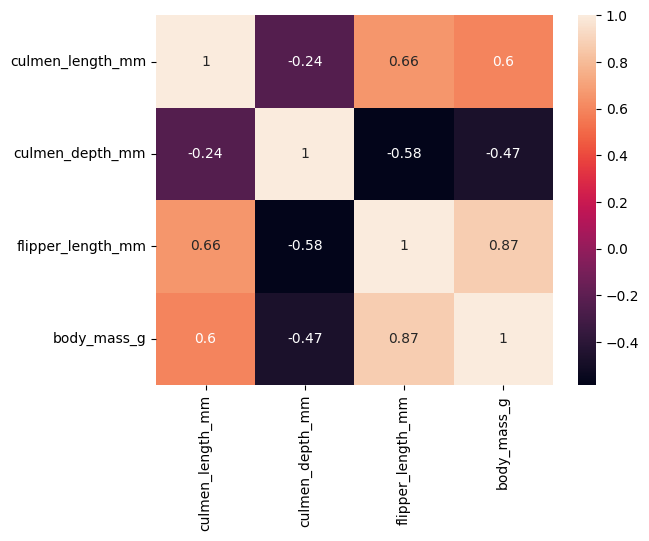

In [8]:
#multivariate analysis
sns.heatmap(df.corr(), annot=True)

In [9]:
#description
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
#missing values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
#dealing with null values for numerical data type --> median approach
df.fillna(df.median(), inplace = True)

<ipython-input-15-4bab37050387>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace = True)


In [13]:
#dealing with null values for categorical data type --> mode approach
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

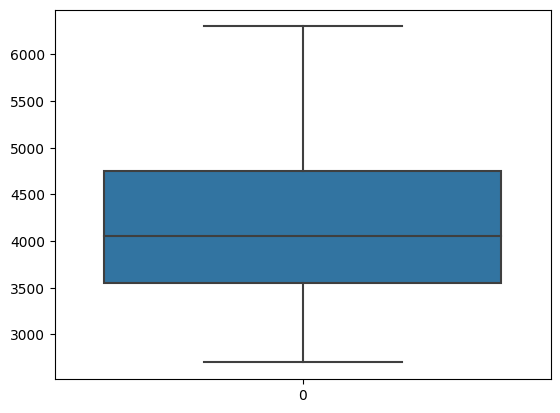

In [20]:
#outlier detection
sns.boxplot(df.body_mass_g)

no outliers detected in any of the features

In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [24]:
df['species_type'] = labelencoder.fit_transform(df['species'])

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_type
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE,0
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE,0


In [38]:
df.drop(['species'], axis = 1,inplace=True)

In [29]:
df['island_type'] = labelencoder.fit_transform(df['island'])

In [39]:
df.drop(['island'], axis = 1,inplace=True)

In [40]:
df['sex_type'] = labelencoder.fit_transform(df['sex'])
df.drop(['sex'], axis = 1, inplace = True)

In [41]:
X = df.drop(columns =['species_type'],axis =1)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_type,sex_type
0,39.10,18.7,181.0,3750.0,2,2
1,39.50,17.4,186.0,3800.0,2,1
2,40.30,18.0,195.0,3250.0,2,1
3,44.45,17.3,197.0,4050.0,2,2
4,36.70,19.3,193.0,3450.0,2,1


In [42]:
y = df.species_type
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_type, dtype: int64

In [43]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [44]:
 scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
 scaled_x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_type,sex_type
0,0.254545,0.666667,0.152542,0.291667,1.0,1.0
1,0.269091,0.511905,0.237288,0.305556,1.0,0.5
2,0.298182,0.583333,0.389831,0.152778,1.0,0.5
3,0.449091,0.500000,0.423729,0.375000,1.0,1.0
4,0.167273,0.738095,0.355932,0.208333,1.0,0.5


In [45]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [46]:
x_train.shape

(275, 6)

In [47]:
y_train.shape

(275,)

In [48]:
x_test.shape

(69, 6)

In [49]:
y_test.shape

(69,)